# Image Loading & Processing

Learning how to read, manipulate and write images using NumPy, which treats the images as `ndarray` or N-dimensional array. 

## 1. NumPy

### Import libraries and load image

In [1]:
from PIL import Image
import numpy as np

im = np.array(Image.open('images/wot-face.jpg'))
im

array([[[ 38,  44,  92],
        [ 52,  58, 106],
        [ 41,  47,  95],
        ...,
        [141, 127, 100],
        [146, 132, 105],
        [149, 135, 108]],

       [[ 42,  50,  97],
        [ 50,  58, 105],
        [ 40,  48,  95],
        ...,
        [143, 129, 102],
        [147, 133, 106],
        [148, 134, 107]],

       [[ 27,  35,  82],
        [ 27,  35,  82],
        [ 22,  30,  77],
        ...,
        [145, 131, 104],
        [146, 132, 105],
        [146, 132, 105]],

       ...,

       [[ 24,  24,  26],
        [ 24,  24,  26],
        [ 25,  25,  27],
        ...,
        [ 11,  13,  10],
        [  5,  10,   6],
        [  2,   7,   3]],

       [[ 24,  24,  26],
        [ 23,  23,  25],
        [ 23,  23,  25],
        ...,
        [  6,  11,   7],
        [  3,   8,   4],
        [  1,   6,   2]],

       [[ 25,  25,  27],
        [ 24,  24,  26],
        [ 22,  22,  24],
        ...,
        [  2,   7,   3],
        [  2,   7,   3],
        [  2,   7,   3]]

### ndarray to PIL image (to view)
To view an image, we pass `ndarray` to `Image.fromarray()`, which returns a PIL.Image

<PIL.Image.Image image mode=RGB size=640x640 at 0x7F26FC0613A0>
RGB


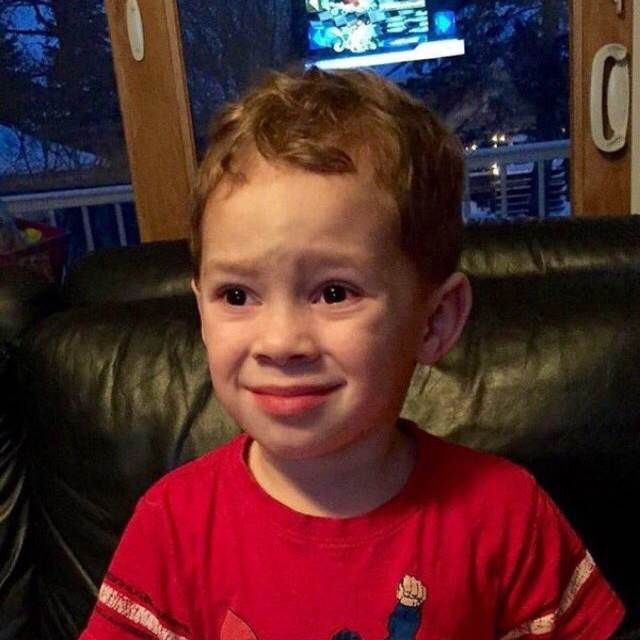

In [2]:
pil_im = Image.fromarray(im)
print(pil_im)
print(pil_im.mode)
pil_im

In [3]:
print(type(im))

print(im.dtype)

print(im.shape)

<class 'numpy.ndarray'>
uint8
(640, 640, 3)


As you can see above, shape of image returns `(row (height), column (width), color (channel))`

In PIL, RGB is the order, in cv2 BGR is the order.


### Convert to grayscale
To convert to grayscale image, 

In [4]:
im_gray = np.array(Image.open('images/wot-face.jpg').convert('L'))
print(im_gray.shape)
im_gray

(640, 640)


array([[ 48,  62,  51, ..., 128, 133, 136],
       [ 53,  61,  51, ..., 130, 134, 135],
       [ 38,  38,  33, ..., 132, 133, 133],
       ...,
       [ 24,  24,  25, ...,  12,   8,   5],
       [ 24,  23,  23, ...,   9,   6,   4],
       [ 25,  24,  22, ...,   5,   5,   5]], dtype=uint8)

<PIL.Image.Image image mode=L size=640x640 at 0x7F26BE149040>
L


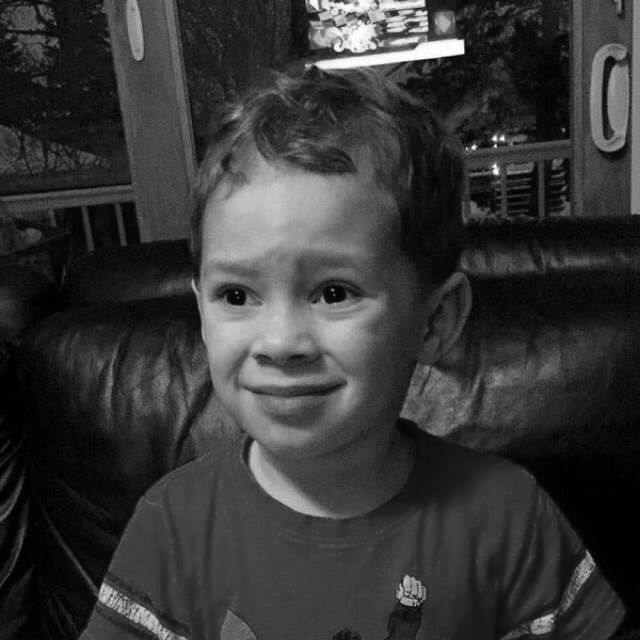

In [5]:
pil_im_gray = Image.fromarray(im_gray)
print(pil_im_gray)
print(pil_im_gray.mode)
pil_im_gray

### To view only one color channel
To view only specific color channels of an image we set the value of other colors to 0.

<PIL.Image.Image image mode=RGB size=1920x640 at 0x7F26BE149E80>


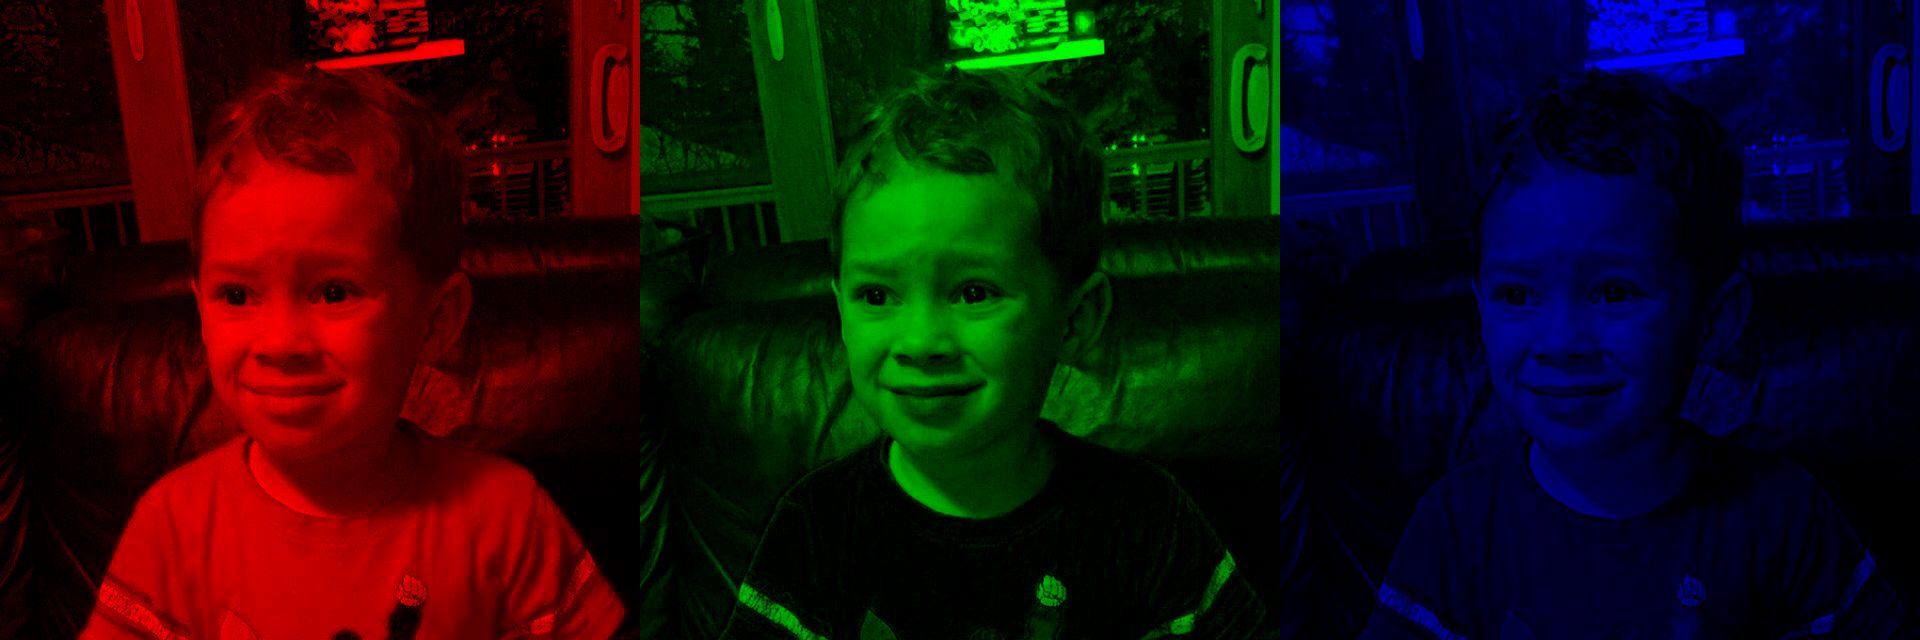

In [6]:
im_R = im.copy()
im_R[:, :, (1, 2)] = 0
im_G = im.copy()
im_G[:, :, (0, 2)] = 0
im_B = im.copy()
im_B[:, :, (0, 1)] = 0

im_RGB = np.concatenate((im_R, im_G, im_B), axis=1)
# im_RGB = np.hstack((im_R, im_G, im_B))
# im_RGB = np.c_['1', im_R, im_G, im_B]

pil_im_RGB = Image.fromarray(im_RGB)
print(pil_im_RGB)
pil_im_RGB

## 2. OpenCV

### Load image
`cv2` package provides an `imread()` function to load the image. It also reads a PIL image in the NumPy array format. The only thing we need to convert is the image color from BGR to RGB using `cvtColor()`. `imwrite()` saves the image in the file.

In [7]:
import cv2

im = cv2.imread('images/wot-face.jpg')
#im = cv2.imread('wot-face.jpg', 1)
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)   # BGR -> RGB

print(type(img))
print(img.shape)
print(img.dtype)
img

<class 'numpy.ndarray'>
(640, 640, 3)
uint8


array([[[ 38,  44,  92],
        [ 52,  58, 106],
        [ 41,  47,  95],
        ...,
        [142, 126, 100],
        [146, 132, 105],
        [149, 135, 108]],

       [[ 43,  49,  97],
        [ 50,  58, 105],
        [ 41,  47,  95],
        ...,
        [144, 128, 102],
        [147, 133, 106],
        [148, 134, 107]],

       [[ 27,  35,  82],
        [ 25,  36,  82],
        [ 22,  30,  79],
        ...,
        [146, 130, 104],
        [146, 132, 105],
        [146, 132, 105]],

       ...,

       [[ 24,  24,  26],
        [ 24,  24,  26],
        [ 25,  25,  27],
        ...,
        [ 11,  13,  10],
        [  5,  10,   6],
        [  2,   7,   3]],

       [[ 24,  24,  26],
        [ 23,  23,  25],
        [ 23,  23,  25],
        ...,
        [  6,  11,   7],
        [  3,   8,   4],
        [  1,   6,   2]],

       [[ 25,  25,  27],
        [ 24,  24,  26],
        [ 22,  22,  24],
        ...,
        [  2,   7,   3],
        [  2,   7,   3],
        [  2,   7,   3]]

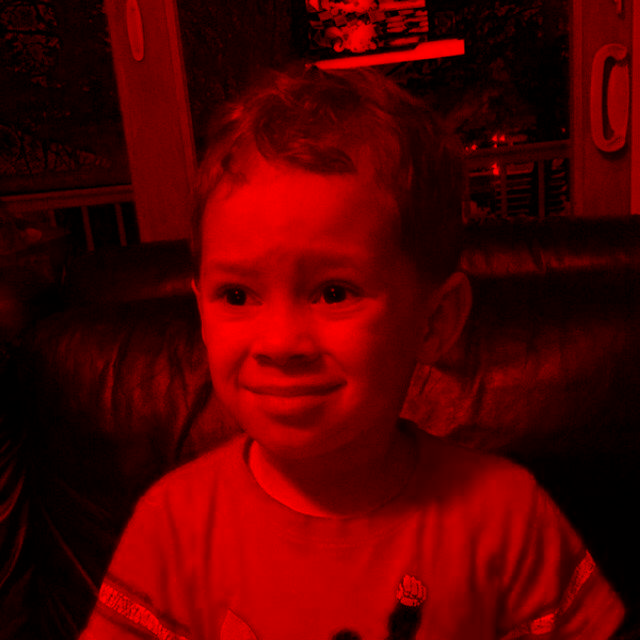

In [8]:
R_img = img.copy()
R_img[:, :, (1, 2)] = 0
pil_R_img = Image.fromarray(R_img)
pil_R_img

### Saving the image to file

In cv2, when images are saved/written, the color channels are in `BGR` order. So we convert them again while saving.

In [9]:
cv2.imwrite('images/red-wot-face.jpg', cv2.cvtColor(R_img, cv2.COLOR_BGR2RGB))

True

### Reading image in grayscale

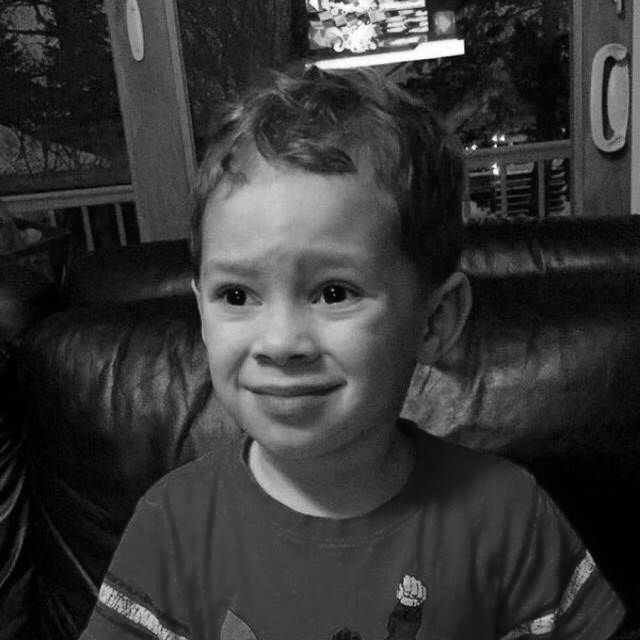

In [10]:
im_gray = cv2.imread('images/wot-face.jpg', cv2.IMREAD_GRAYSCALE)
#im_gray = cv2.imread('wot-face.jpg', 0)
Image.fromarray(im_gray)

### Convert ndarray image to grayscale

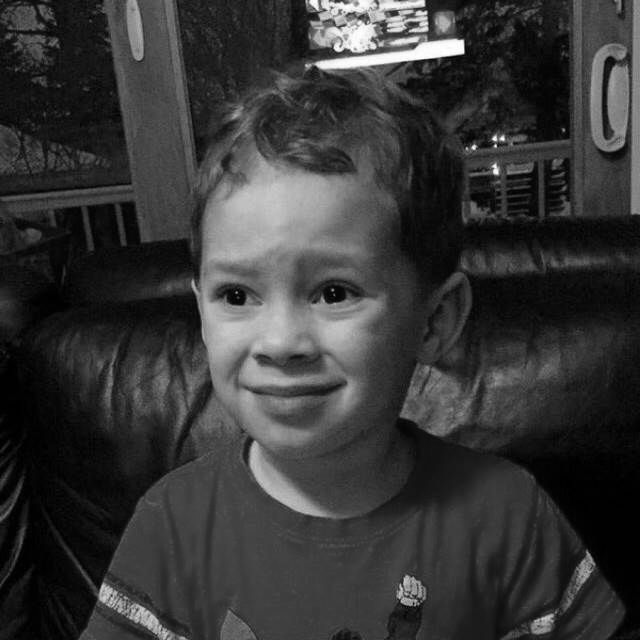

In [11]:
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
Image.fromarray(img)

### Visualize different Color Channels of an RGB image

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


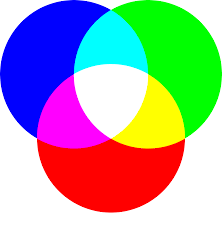

In [12]:
img1=cv2.imread("images/rgb.png")
R, G, B = cv2.split(img1) 
print(B)
print(G)
print(R)
Image.fromarray(img1)

B, G, R


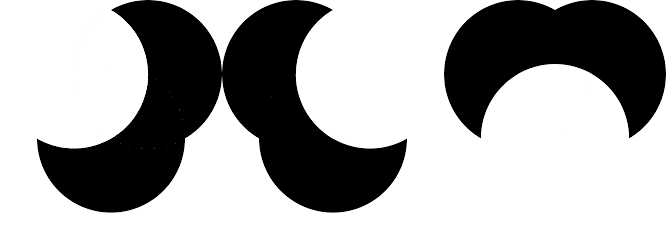

In [13]:
sep_comb_img = cv2.hconcat([B, G, R])
print('B, G, R')
Image.fromarray(sep_comb_img)

## 3. MatPlotLib



(640, 640, 3)


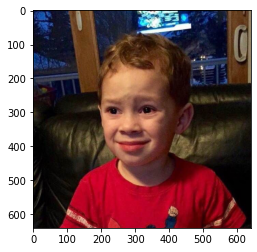

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as img
  
testImage = img.imread('images/wot-face.jpg')
print(testImage.shape)
plt.imshow(testImage)

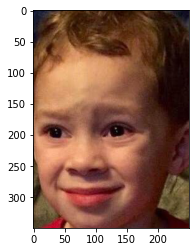

In [15]:
modifiedImage = testImage[100:450, 200:450]
plt.imshow(modifiedImage)